            mean    median       std       max       min
Ticker                                                  
BNO     0.000244  0.000984  0.016683  0.062835 -0.095225
BOTZ   -0.000082  0.000169  0.013790  0.120187 -0.124011
CORN    0.000258  0.000000  0.009344  0.054986 -0.064538
GLD     0.000170  0.000170  0.006358  0.030235 -0.032365
HACK    0.000177  0.000435  0.012033  0.083304 -0.087089
IHI     0.000323  0.000105  0.010676  0.102752 -0.059018
KBE    -0.000027  0.000167  0.015659  0.111180 -0.117696
KIE     0.000161  0.000258  0.012025  0.117676 -0.119466
KRE    -0.000002  0.000000  0.016109  0.109653 -0.109628
PALL    0.000258  0.000804  0.018336  0.190983 -0.142914
PJP     0.000105  0.000205  0.009856  0.073426 -0.074512
PPLT    0.000058  0.000088  0.012738  0.052343 -0.066181
QQQ     0.000289  0.000681  0.011265  0.071193 -0.056398
SKYY    0.000122  0.000615  0.014277  0.106824 -0.100391
SLV     0.000171  0.000172  0.012162  0.076600 -0.066802
SMH     0.000393  0.000526  0.0

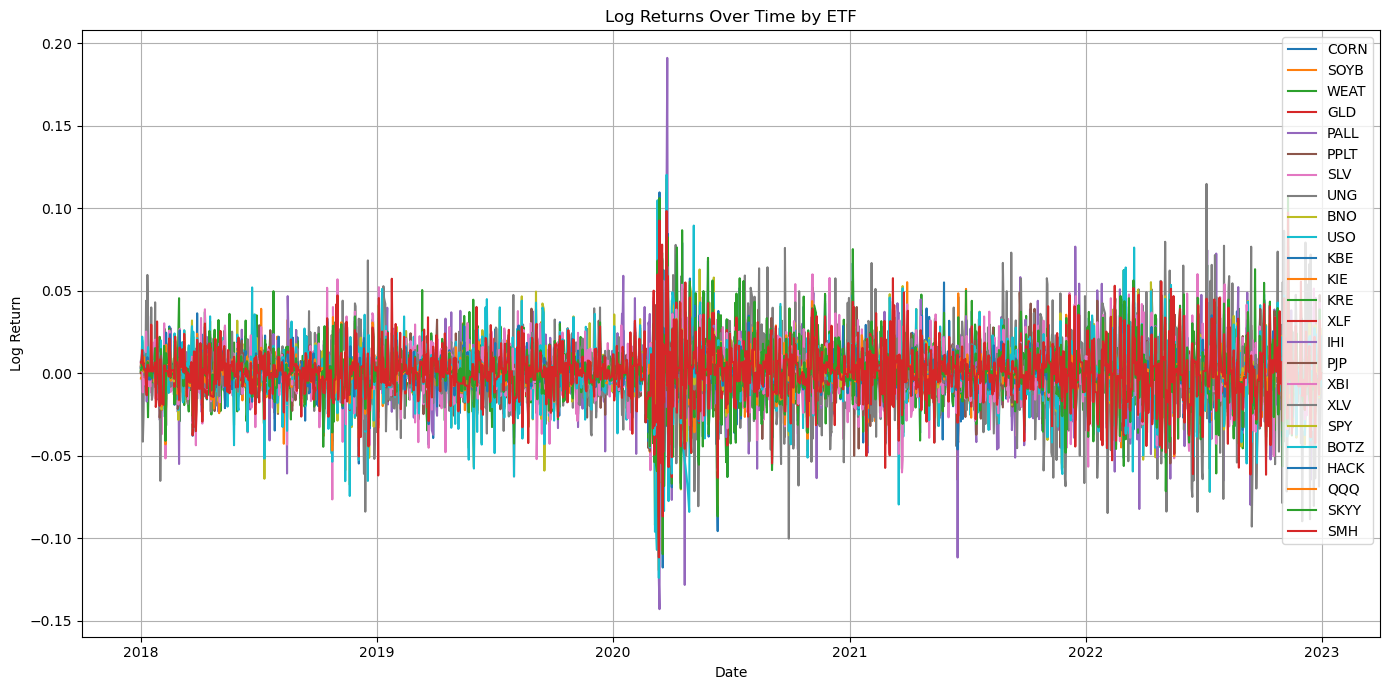

ValueError: x and y must have same first dimension, but have shapes (5478,) and (1,)

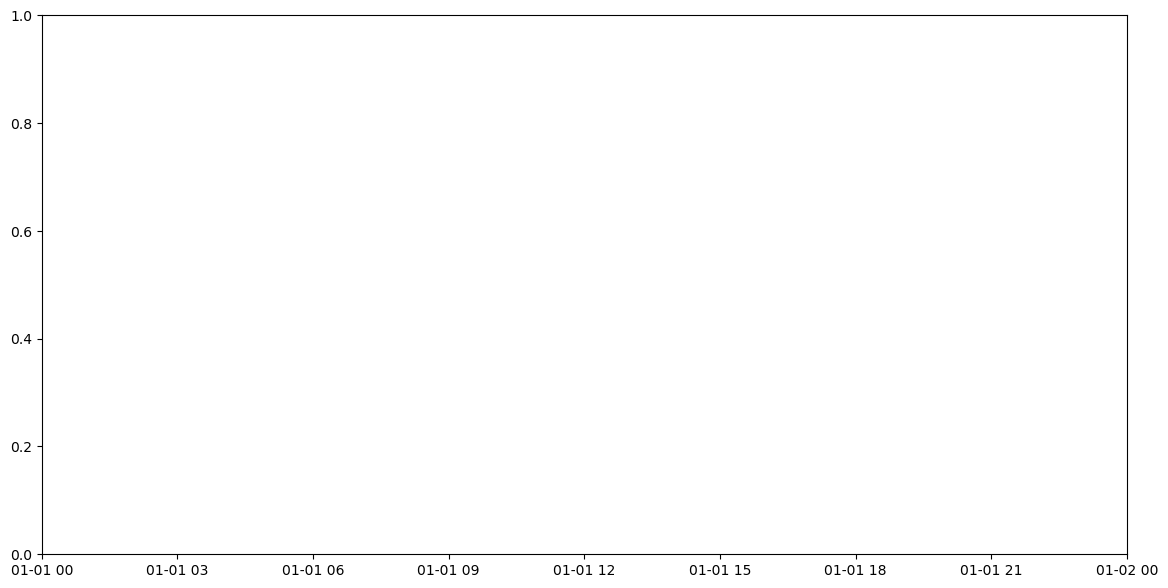

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('etf_ei_merged_data.xlsx')

# 1. Descriptive Statistics for each ETF:

etf_descriptives = df.groupby('Ticker')['log_return'].agg(['mean', 'median', 'std', 'max', 'min'])
print(etf_descriptives)

# 2. Descriptive Statistics for each Sector:

sector_descriptives = df.groupby('Sector')['log_return'].agg(['mean', 'median', 'std', 'max', 'min'])
print(sector_descriptives)

# 3. Plots:

# For ETFs:
plt.figure(figsize=(14, 7))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['log_return'], label=ticker)

plt.title('Log Returns Over Time by ETF')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For Sectors:
plt.figure(figsize=(14, 7))
for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    # We use the mean as a representative value for the sector at each time point
    plt.plot(subset['Date'], subset['log_return'].mean(), label=sector)

plt.title('Average Log Returns Over Time by Sector')
plt.xlabel('Date')
plt.ylabel('Average Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

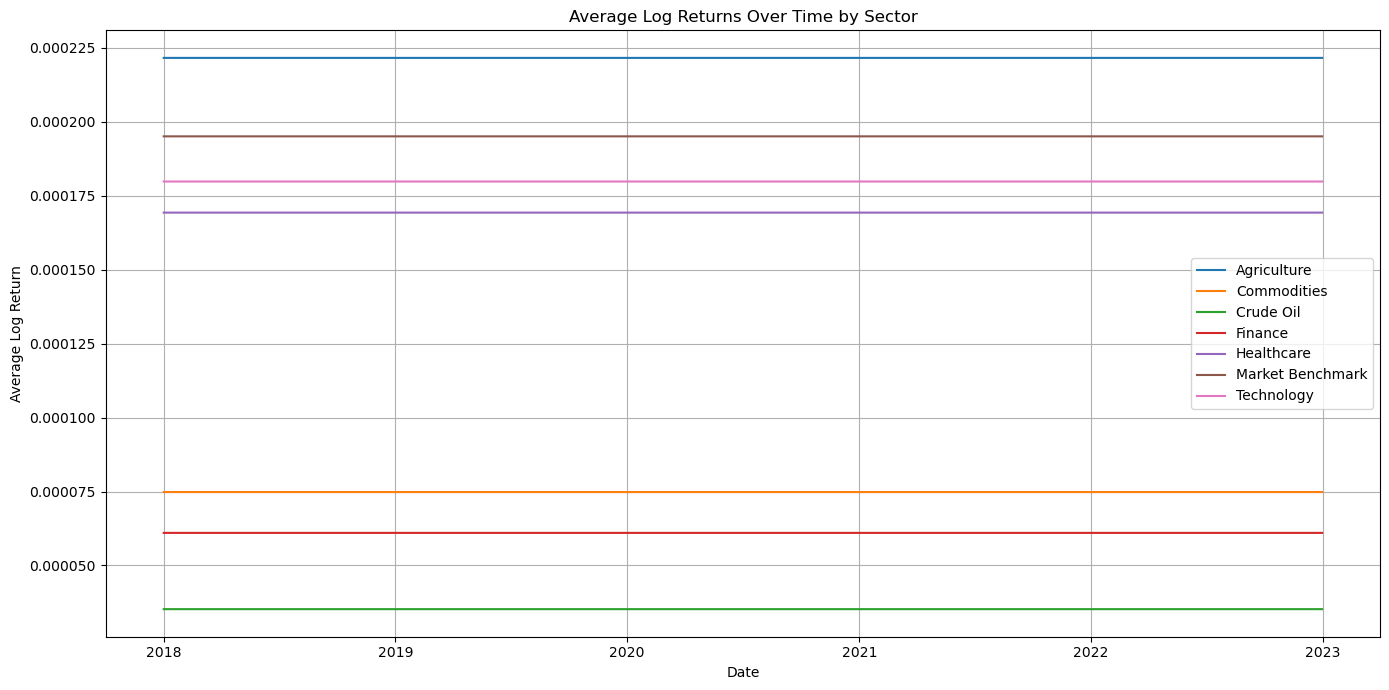

In [2]:
# For Sectors:
plt.figure(figsize=(14, 7))
for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    # Using the mean as a representative value for the sector at each time point
    # We replicate the mean value for each date
    mean_values = [subset['log_return'].mean()] * len(subset)
    plt.plot(subset['Date'], mean_values, label=sector)

plt.title('Average Log Returns Over Time by Sector')
plt.xlabel('Date')
plt.ylabel('Average Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()